**Author:** Anowar Shajib, Mir Sazzat Hossain

In [1]:
import glob

import coloripy as cp
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import paperfig as pf
import seaborn as sns

## Plot settings

In [2]:
save_figure = True

In [3]:
pf.set_fontscale(2.0)


# for MNRAS
mpl.rcParams["ps.fonttype"] = 42

# to change tex to Times New Roman in mpl
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams["mathtext.rm"] = "serif"
plt.rcParams["mathtext.it"] = "serif:italic"
plt.rcParams["mathtext.bf"] = "serif:bold"
plt.rcParams["mathtext.fontset"] = "custom"


sns.set(style="ticks", context="paper", font="Times New Roman", font_scale=2.0)
# sns.set_context('talk')
sns.set_style(
    {
        "xtick.direction": "in",
        "ytick.direction": "in",
        "axes.linewidth": 2.0,
    }
)
# sns.set_palette('Set2')

cmap = sns.cubehelix_palette(
    start=0.5,
    rot=-1.5,
    gamma=1,
    hue=1,
    light=-0.6,
    dark=0.8,
    reverse=False,
    as_cmap=True,
)
cmap2 = sns.cubehelix_palette(
    start=0.5,
    rot=-1.5,
    gamma=1,
    hue=1,
    light=-0.2,
    dark=1.0,
    reverse=False,
    as_cmap=True,
)

msh_cmap = cp.get_msh_cmap(num_bins=501, rescale="power", power=2.5)

# Plot

In [4]:
lens_folders = glob.glob("../lens_systems/*")

system_names = sorted([lens_folder.split("/")[-1] for lens_folder in lens_folders])

In [5]:
def load_image_data(system_name):
    """
    Load image data from HDF5 file.

    :param system_name: name of the lens system
    :type system_name: str
    :return: image data
    :rtype: numpy.ndarray
    """
    file_path = f"../lens_systems/{system_name}/{system_name}_F140W.h5"

    with h5py.File(file_path, "r") as f:
        kwargs_data = {}
        for key in f:
            kwargs_data[key] = f[key][()]

    return kwargs_data["image_data"]


def plot_one_system(ax, system_name):
    """
    Plot image of one lens system.

    :param system_name: name of the lens system
    :type system_name: str
    :return: None
    :rtype:
    """
    image_data = load_image_data(system_name)
    image_data[image_data < 0] = np.min(np.abs(image_data))

    ax.matshow(np.log10(image_data), vmin=-6, cmap=cmap, origin="lower")

    ax.set_xticks([])
    ax.set_yticks([])

    ax.text(
        0.04,
        0.96,
        system_name,
        transform=ax.transAxes,
        fontsize=pf.mnras_text_fontsize * 2,
        color="w",
        va="top",
        ha="left",
        bbox=dict(facecolor="k", alpha=0.90, edgecolor="none"),
    )

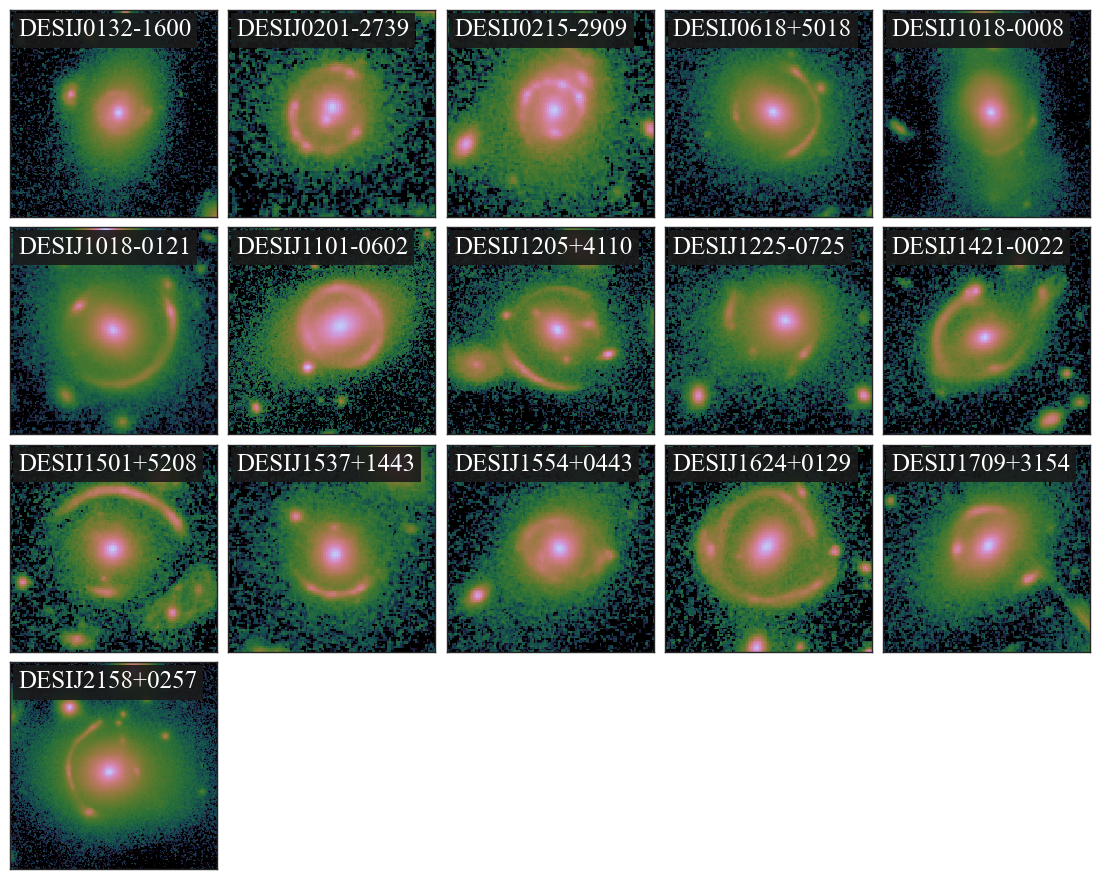

In [6]:
num_col = 5
num_row = (len(system_names) - 1) // num_col + 1

fig, axes = plt.subplots(
    num_row,
    num_col,
    figsize=pf.get_fig_size(pf.mnras_textwidth * 2, height_ratio=num_row / num_col),
)

for i, ax in enumerate(axes.flatten()):
    if i < len(system_names):
        plot_one_system(ax, system_names[i])
    else:
        ax.axis("off")

fig.subplots_adjust(hspace=0.05, wspace=0.05)

if save_figure:
    fig.savefig("../paper/figures/lens_montage.pdf", bbox_inches="tight")